In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.shape

(891, 12)

In [4]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data_train.index=data_train['PassengerId']
data_train=data_train.drop(['PassengerId'],axis=1)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Cabin_Data = data_train[pd.isnull(data_train['Cabin'])]
if Cabin_Data.shape[0]>100:
    data_train=data_train.drop(['Cabin'],axis=1)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
surv=0
for i in range(1,data_train.shape[0]):
    if data_train['Survived'][i]==1 :
        surv+=1
print(surv)

342


In [8]:
data_train=data_train.drop(['Ticket','Name','Embarked'],axis=1)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [9]:
data_train=data_train.dropna(axis=0)
print("NEW SHAPE: ",data_train.shape)
data_train[data_train['Age']==None]

NEW SHAPE:  (714, 7)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,


In [10]:
data_train.index.names=["P.Id"]
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
P.Id,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [11]:
data_train.Sex = data_train.Sex.map( {'male':0,'female':1} )
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
P.Id,,,,,,,
1,0,3,0,22.0,1,0,7.2500
2,1,1,1,38.0,1,0,71.2833
3,1,3,1,26.0,0,0,7.9250
4,1,1,1,35.0,1,0,53.1000
5,0,3,0,35.0,0,0,8.0500


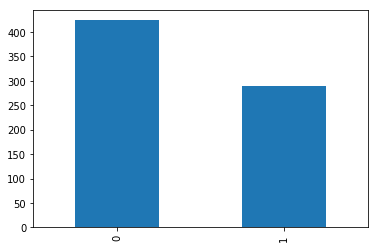

In [12]:
pd.value_counts(data_train['Survived']).plot.bar()

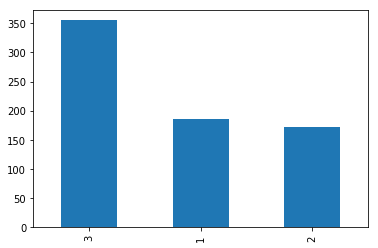

In [13]:
pd.value_counts(data_train['Pclass'] ).plot.bar()

In [14]:
data_train.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
X_train=data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values # Remember the '[ [] ] data_train[['Survived', 'Pclass', 'Sex', 'Age']] # Remember the '[ [] ]' 
Y_train=data_train['Survived'].values
W=np.array([0.5,0.5,0.5,0.5,0.5,0.5])
print(X_train.shape,Y_train.shape)
bias=4.2

(714, 6) (714,)


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)

In [17]:
clf.predict_proba(X_train[0:3, :])

array([[0.90202229, 0.09797771],
       [0.10497725, 0.89502275],
       [0.38287193, 0.61712807]])

In [18]:
data_test=pd.read_csv('test.csv')
data_test.index=data_test['PassengerId']
data_test=data_test.drop(['PassengerId'],axis=1)
Cabin_Data = data_test[pd.isnull(data_test['Cabin'])]
if Cabin_Data.shape[0]>100:
    data_test=data_test.drop(['Cabin'],axis=1)
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
import random
from random import randint

data_test.Sex = data_test.Sex.map( {'male':0,'female':1} )
data_test=data_test.drop(['Ticket','Name','Embarked'],axis=1)
print(data_test.head())
data_test.Age = data_test.Age.apply(lambda x: x if not pd.isnull(x) else 24)
data_test.Fare = data_test.Fare.apply(lambda x: x if not pd.isnull(x) else 35)
data_test.Sex = data_test.Sex.apply(lambda x: x if not pd.isnull(x) else randint(0,1))

print("NEW SHAPE: ",data_test.shape)
X_test=data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values # Remember the '[ [] ] data_train[['Survived', 'Pclass', 'Sex', 'Age']] # Remember the '[ [] ]' 


             Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                          
892               3    0  34.5      0      0   7.8292
893               3    1  47.0      1      0   7.0000
894               2    0  62.0      0      0   9.6875
895               3    0  27.0      0      0   8.6625
896               3    1  22.0      1      1  12.2875
NEW SHAPE:  (418, 6)


In [20]:
Y_test=clf.predict(X_test)
Y_test.shape

(418,)

In [21]:
data_result=pd.DataFrame(Y_test)
data_result.columns = ['Survived']
data_result=data_result.set_index(data_test.index[:len(data_test)])
print(data_result.head(7))
data_result.to_csv('Results.csv')

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
897                 0
898                 1
